This tutorial was done using [Towards Data Science's EDA tutorial.](https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce)

### Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

### Loading the dataset 

In [2]:
cars = pd.read_csv("car_data.csv")
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cars.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### Checking types of data 

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


### Dropping irrelevant columns 

In [5]:
cars = cars.drop(
    [
        "Engine Fuel Type",
        "Market Category",
        "Vehicle Style",
        "Popularity",
        "Number of Doors",
        "Vehicle Size",
    ],
    axis=1,
)
cars.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Renaming the columns 

In [6]:
cars = cars.rename(
    columns={
        "Engine HP": "HP",
        "Engine Cylinders": "Cylinders",
        "Transmission Type": "Transmission",
        "Driven_Wheels": "Drive mode",
        "highway MPG": "MPG-H",
        "city mpg": "MPG-C",
        "MSRP": "Price",
    }
)
cars.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Dropping the duplicated rows 

In [7]:
cars.shape

(11914, 10)

In [8]:
# rows containing duplicate data
cars_duplicate_rows = cars[cars.duplicated()]
print("The number of duplicate rows is {}.".format(cars_duplicate_rows.shape))

The number of duplicate rows is (989, 10).


In [9]:
# counting the total number of rows
cars.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [10]:
# dropping the duplicates
cars = cars.drop_duplicates()
cars.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Dropping null values 

In [11]:
cars.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [12]:
cars = cars.dropna()
cars.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

### Detecting outliers 

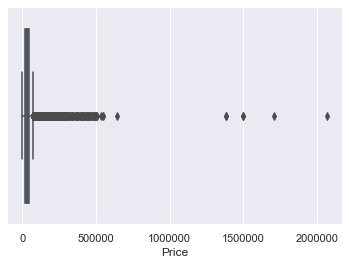

In [13]:
sns.boxplot(x=cars["Price"])
plt.show()

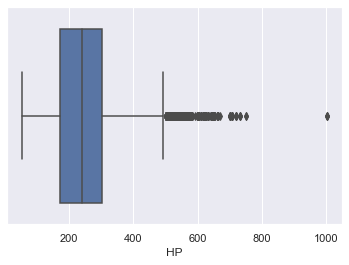

In [14]:
sns.boxplot(x=cars["HP"])
plt.show()

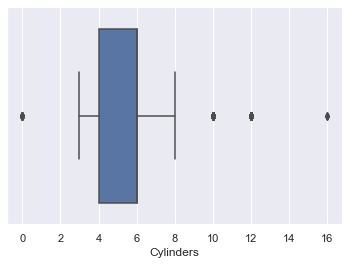

In [15]:
sns.boxplot(x=cars["Cylinders"])
plt.show()

In [16]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [17]:
# removing the outliers

cars = cars[~((cars < (Q1 - 1.5 * IQR)) | (cars > (Q3 + 1.5 * IQR))).any(axis=1)]
cars.shape

(9191, 10)

Nearly 1700 rows where deleted due to outlying values.

### Visualization 

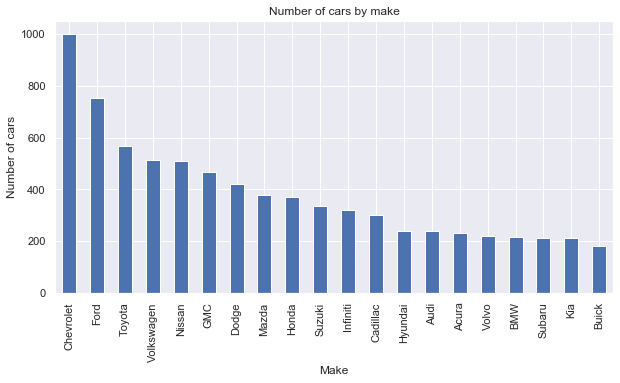

In [18]:
# plotting histogram

cars.Make.value_counts().nlargest(20).plot(kind="bar", figsize=(10, 5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make")
plt.show()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


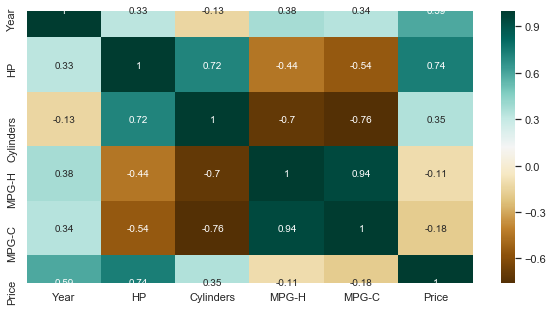

In [19]:
# correlation heatmap

plt.figure(figsize=(10, 5))
c = cars.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

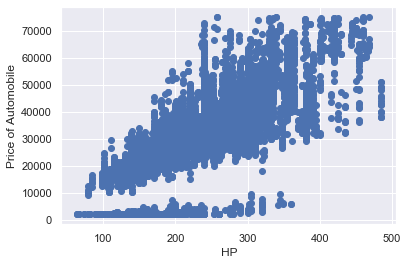

In [20]:
# scatter plot

plt.scatter(cars["HP"], cars["Price"])
plt.xlabel("HP")
plt.ylabel("Price of Automobile")
plt.show()